In [34]:
# importing dependencies.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score


In [35]:
# load dataset.
df = pd.read_csv('../data/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [36]:
# statistical description.
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [37]:
# datatype of each column.
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [38]:
# determining the null values.
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [39]:
# preparing the training and testing data.
X = df.drop(columns=['Species'])
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# training the model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [41]:
# predicting the test samples.
y_pred = model.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

In [42]:
# determining the confusion matrix.
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [43]:
# determining the TP, TN, FP, FN.
total = np.sum(cm)
for i in range(len(cm)):
    tp = cm[i, i]
    fp = np.sum(cm[:, i]) - tp  #sum of column i minus TP
    fn = np.sum(cm[i, :]) - tp  #sum of row i minus TP
    tn = total - tp - fp - fn
    print(f'Class {i}: TP:{tp}, FP:{fp}, FN:{fn}, TN:{tn}')

Class 0: TP:10, FP:0, FN:0, TN:20
Class 1: TP:9, FP:0, FN:0, TN:21
Class 2: TP:11, FP:0, FN:0, TN:19


In [ ]:
# formulas for metrics (optional but need to know)
accuracy_1 = (tp + tn) / (tp + tn + fp + fn)
error_rate = 1 - accuracy_1
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision_1 * recall) / (precision_1 + recall)

<Axes: >

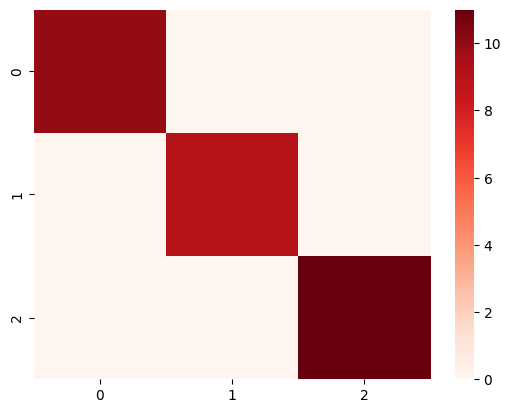

In [45]:
# displaying the confusion matrix.
sns.heatmap(data=cm, cmap='Reds')